# 1. Hashing task!

### For this task we're dealing withhash functions and a structure called Bloom Filter.
#### Download the datasets here. You will find a .zip archive with two quite big files: passwords1.txt and  passwords2.txt .Each row of the files corresponds to a string of 20 characters. The first dataset represents your "pool" of passwords and you will have to find how many passwords of the second dataset are already present in the pool.

In [ ]:
import numpy as np
import time
import sympy
 
#read password1 and put to pool
with open(r'G:\ADM-2019-1\HW4\DATA\passwords1.txt','r') as f:
    pass1 = f.read().split('\n')
    
# n is the number of passwords
# p is the probably of False positive error
# m is the lenght of bloom filter
# k is the number of hash function

n=len(pass1)
p=0.001
m=int(-(n*np.log(p))/np.square(np.log(2)))
prime_number=sympy.prevprime(m)
k=np.ceil((m/n)*np.log(2))

#use coefficients for finding hash values
c_mat = np.random.randint(m-1, size=(int(k), 20))

### calculate k hash values

In [ ]:
##Add all passwords1 to the filter
start=time.time

def hashes_func(password,coefficient,filter_length):
    hash_filter=[]
    hash_filter=np.zeros(filter_length, dtype=int)
    for word in password:
        ascii_codes=[]
        for ch in word:
            ascii_codes.append(ord(ch))
        for c in coefficient:
            i=np.sum(c*ascii_codes)%m
            try:
                hash_filter[i]=1
            except:
                continue
    return hash_filter
bloomfilter=[]
bloomfilter=hashes_func(pass1,c_mat,m)

In [ ]:
#Check how many passwords of the second dataset are present in the bloom filter. 
#Get password2 for checking

with open(r'G:\ADM-2019-1\HW4\DATA\passwords2.txt','r') as g:
    pass2 = g.read().split('\n')
    
def bloom_filter(password,bfilter,coefficient):    
#Calculate the number of duplicates detected
    N=0
    for word in password:
        l=0
        ascii_codes=[]
        for ch in word:
            ascii_codes.append(ord(ch))
        for c in coefficient:
            i=np.sum(c*ascii_codes)%m
            if bfilter[i]==1:
                l+=1
        if l==k:
            N+=1
    return N

duplicates= bloom_filter(pass2,bloomfilter,c_mat)           
end=time.time()

print('Number of hash function used: ', k)
print('Number of duplicates detected: ', duplicates)
print('Probability of false positives: ', p)
print('Execution time: ',end-start)  

# 2. Alphabetical Sort

#### In this exercise you are asked to perform Alphabetical Sort exploiting the algorithm of Counting Sort.Therefore:

 - Build your own implementation of Counting Sort. If it's based (based, not copied!) on some reference on Internet, please cite it.
 
 
 

 - Build an algorithm, based on your implementation of Counting Sort, that receives in input a list with all the letters of the alphabet (not in alphabetical order), and returns the list ordered according to alphabetical order. Discuss time complexity (theoretically and empirically).
 
 
 
 

 - Build an algorithm, based on your implementation of Counting Sort, that receives in input a list of length m, that contains words with maximum length equal to n, and returns the list ordered according to alphabetical order. Discuss time complexity (theoretically and empirically).

#### My Counting Sort

In [57]:
import numpy as np

In [58]:
def CS(array):

    m = max(array)
    cont = np.zeros(m+1, int)      # create a zeros-list 
    
    for i in array:
        cont[i]+=1                 # count the frequencies of numbers in array
    k=0
    for j in range(m+1):
        while cont[j] != 0:
            
            array[k] = j           # sort numbers in the array, checking every index and reducing frequencies list to 0.
            k+=1
            cont[j]-=1
   
        
    return  array
        

This function takes a list of numbers as input. If we call __n__ the #elements in the list:
- when it searches the max (and so checks every element), it takes __O(n)__ 
- to create the numpy array it takes __O(1)__ [constant]
- the first 'for' takes __O(n)__
- the second 'for' takes __O(m+1)__, but it includes a 'while' that takes __O(n)__ ('cause the cont list has in total n decrements -1), and so the loop takes __O(n+m+1)__

The time complexity of this Algorithm takes in total $O(n+m)$



In [59]:
CS([4,3,8,3,3,6,2,2])

[2, 2, 3, 3, 3, 4, 6, 8]

### Alphabetical Counting Sort

In [60]:
import string
from string import ascii_letters

In [61]:

def alfaCS(array):
    
    # create a dictionary with key = letters from a to z, and values = numbers from 0 to 26 (it includes uppercase)
    di=dict(zip(string.ascii_letters,[ord(c)%32 for c in string.ascii_letters]))     
    
    new_arr= []
    sort_arr = []
    
    for i in array:
        k = di[i]
        new_arr.append(k)               # transform letters to numbers
        
    CS(new_arr)                         # apply my Counting Sort
    
    sort_arr= []
    
    for j in new_arr:
        x = list(di.keys())[j-1]        # re-transform numbers to letters
        sort_arr.append(x)
    
    return sort_arr 

This algo takes a list of lenght __n__ as input:
- the creation of the dictionary takes __O(1)__
- the first 'for' checks all the elems in the list and append'em to another list; it takes __O(n)__
- the application of CS() to the list take __O(n+m)__
- the second 'for' transforms numbers and append'em in a list, it takes __O(n)__ ('cause the *j* elements in the list are the same amount of *k* (=*i* = *n*).

The time complexity of this Algorithm takes in total $O(n+m)$

In [62]:
alfaCS(['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','x','z','c','v','b','n','m'])

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

### Words Counting Sort

In [5]:
def wordCS(array):
    
    order = [array[0]]       # the insertion algo is based on the first word in the array
    sort = []
    new_ar = []
    
    for i in range(1,len(array)): 
        for j in range(len(order)):
                k =0
                while k < len(array[i])-1 and k < len(order[j])-1 and array[i][k] == order[j][k]:  
                    k += 1  # if the first letters are equal, incrementing k, checks the seconds ones, the third ones, etc.
                            # the while loop stops when one word is shorter than another, even if they have same letters 
                            # e.g. ("hell", "hello")
                            
                if order[j][k] == ' ' and array[i][k] != ' ':
                    sort = [order[j], array[i]]
                    if j == len(order)-1:
                        order.append(array[i])                      # sorts when it meets a space during a match position
                        break                                                 
      
                else:
                    new_ar = [array[i][k], order[j][k]]
                    sort = alfaCS(new_ar)                           # apply my alfaCS function to sort letters                     
                    
                    if sort == new_ar:
                        order.insert(j, array[i])                   # if the letters are already sorted,
                        break                                       # it appends the word to the list 'order' before the 
                    else:                                           # the last word inserted. If not, it just appends word 
                        if j == len(order)-1:                       # into the list.
                            order.append(array[i])
                            break    
                            
                    
    return order


The final function takes a list of words as input. We call __n__ the #words. Every word has a different length, that we called __k__:

- the first 'for' takes __O(n)__ and the concatenate second 'for' (that checks from 0 to n) too. So it takes __O(n$^2$)__
- we have also a 'while' loop into the 'for' that takes __O(k)__
- when the program calls the function alfaCS, it takes __O(n+m)__, but it's inside the 'for' loop

The time complexity of this function takes in total $O(n^2k + n+m)$

And so, if: $k \approx n$ ----------- $O(n^3) $

Else: $ k << n $ ----------- $O(n^2) $

In [6]:
wordCS(['well done','hello', 'park guell', 'world', 'well','hell', 'paradise','park','hitmonlee', 'precipitevolissimevolmente', 'hit'])

['hell',
 'hello',
 'hit',
 'hitmonlee',
 'paradise',
 'park',
 'park guell',
 'precipitevolissimevolmente',
 'well',
 'well done',
 'world']

# 3. Find similar wines!

The goal of this exercise is to find set of similar wines according to some specific characteristics.

In [7]:
#Importing the libraries
import pandas as pd
import matplotlib
import math
import random
import numpy as np
import matplotlib.pyplot as plt

Before we use the data that we have, we have to pre process it to get the right results. In the following lines of code, we are importing, renaming, checking for missing values,cleaning the data etc in order to perform KMeans clustering without any obstacles

In [8]:
#Importing the Wine Dataset with pandas
dataset = pd.read_csv('wine.data', header = None)

In [9]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


 #### As we can see, we should rename the columns in order to clean up and have a nicer view of the dataset

In [10]:
#Renaming the columns of the dataset

dataset.columns = ['Wine_Class','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
                   'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines',
                   'Proline']

In [11]:
dataset.head()

,Wine_Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
#Let's take a look at the variables we have on the dataset using pandas function describe()
dataset.describe()

,Wine_Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Let's check whether we have any missing values on the dataset

In [13]:
dataset.isnull().sum()

Wine_Class                      0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

 We have no missing values. KMeans cannot analyze datasets that have missing data values. Some of the most common solutions on how to deal with missing values are either to fill in the missing values or ignore the missing data. In our case we don't have to apply any of this data manipulation strategies.

### Implementing the KMeans Algorithm

The main objective of the KMeans algorithm is to minimize the sum of distances between the points and the  centroid.

Euclidean Distance is one of the distance measures used on KMeans algorithm. Euclidean distance between of a observation and initial cluster centroids is calculated. Based on euclidean distance each observation is assigned to one of the clusters - based on minimum distance.

$$|\vec{distance}|=\sqrt{(x{2}-x{1})^2 + (y{2}-y{1})^2}$$


#### Step 1: Choose the number of clusters k
We have to choose the number of clusters in order to perform the clustering.


We are going to start by slicing the data we want to cluster. In this first clustering analysis we are going to perform the analysis on Alcohol Percentage and Malic Acid to see whether there is any tendency between them.


In [14]:
X = dataset[["Alcohol","Malic acid"]]
X.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [15]:
#K is the number of clusters we have decided to use for the clustering.
K=3

#### Step 2: Select random Points as Inicial Centroids 
Next, we randomly select the centroid for each cluster. Let’s say we want to have 3 clusters, so k = 3. Afterwards we select the centroid randomly. (At the end, you can see the plotting of the Alcohol % and Malic Acid with the randomly selected clusters)


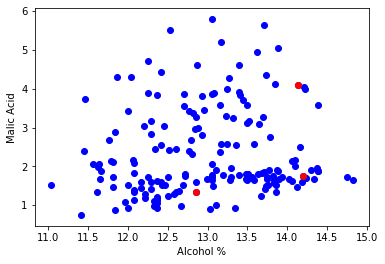

In [16]:
centroids = (X.sample(n=K))
plt.scatter(X["Alcohol"],X["Malic acid"],c='blue')
plt.scatter(centroids["Alcohol"],centroids["Malic acid"],c='red')
plt.xlabel('Alcohol %')
plt.ylabel('Malic Acid')
plt.show()

#### Step 3: Assign all the points to the closest cluster centroid
Once we have initialized the centroids, we assign each point to the closest cluster centroid.
We have initially defined the difference as 1 and inside the while loop, we are going to calculate the difference between the centroids in the previous case and the current case. When this difference is going to be 0, the program is going to stop.

#### Step 4: Calculate the centroids of the new clusters
Now, once we have assigned all of the points to either cluster, the next step is to calculate the centroids of the new clusters.

#### Step 5 : Repeat the previous steps till newly formed clusters are not changing.
The algorithm is going to stop if the centroids of the new clusters are not changing. Even after multiple testings, if the centroids are not changing, it is understandable that the algorithm is not changing and it is going to stop.



In [17]:
calculation = 1 #Incialization of the differences we are going to calculate.
j=0

while(calculation!=0):

    x_distance=X
    i=1
    for index1,row_c in centroids.iterrows():
        euclidean=[]
        for index2,row_d in x_distance.iterrows():
            d1=(row_c["Alcohol"]-row_d["Alcohol"])**2  #Difference between Y2 and Y1 (In Euclidean Distance Formula)
            d2=(row_c["Malic acid"]-row_d["Malic acid"])**2 #Difference between X2 and X1 (In Euclidean Distance Formula)
            d=np.sqrt(d1+d2) #Implementation of the Euclidean Distance Formula
            euclidean.append(d)
        X[i]=euclidean
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    centroids_new = X.groupby(["Cluster"]).mean()[["Malic acid","Alcohol"]]
    if j == 0:
        calculation=1
        j=j+1
    else:
        calculation = (centroids_new['Malic acid'] - centroids['Malic acid']).sum() + (centroids_new['Alcohol'] - centroids['Alcohol']).sum()
        print(calculation.sum())
    centroids = X.groupby(["Cluster"]).mean()[["Malic acid","Alcohol"]]

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.4360479812573059
-0.15411465872880048
-0.104884674320191
-0.02606288156288339
-0.0257564102564114
0.0


#### Let's take a look into the dataset and the clusters that the variables are assigned.

In [18]:
X

,Alcohol,Malic acid,1,2,3,Cluster
0,14.23,1.71,2.017308,0.522373,2.476847,2
1,13.20,1.78,0.994627,0.515761,2.119220,2
2,13.16,2.36,1.181304,0.788921,1.537850,2
3,14.37,1.95,2.176840,0.671650,2.343069,2
4,13.24,2.59,1.389734,0.922267,1.316724,2
...,...,...,...,...,...,...
173,13.71,5.65,4.267804,3.850311,1.870582,3
174,13.40,3.91,2.549718,2.133745,0.337143,3
175,13.27,4.28,2.831328,2.519979,0.437202,3
176,13.17,2.59,1.338861,0.960224,1.309164,2


As we can see from the dataset, each data point is assigned to the nearest centroid using the Euclidean Distance. For example: if we see the first row (index 0), we can see that the distance from Cluster 1 is 2.47, the distance from Cluster 2 is 0.52 and the distance from the Cluster 3 is 2.01, therefore this data point has been assigned to the Cluster 2, since the distance is the smallest compared to the other clusters.

#### Visualizing the clusters 

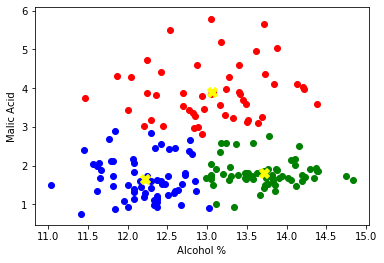

In [20]:
color=['blue','green','red']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Alcohol"],data["Malic acid"],c=color[k])
plt.scatter(centroids["Alcohol"],centroids["Malic acid"],c='yellow', marker = 'X',s = 100) #Centroids
plt.xlabel('Alcohol %')
plt.ylabel('Malic Acid')
plt.show()

#### We are going to perform another clustering analysis (using the same code as above), but in this case we are going to use Wine_Class and Alcohol to see whether the different classes of wine have anything to do with the Alcohol %

In [21]:
X = dataset[["Magnesium","Alcohol"]]

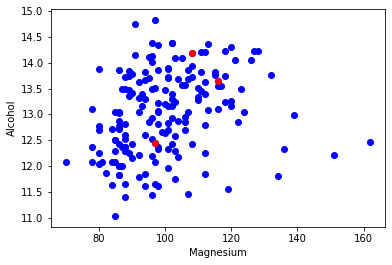

In [22]:
centroids = (X.sample(n=K))
plt.scatter(X["Magnesium"],X["Alcohol"],c='blue')
plt.scatter(centroids["Magnesium"],centroids["Alcohol"],c='red')
plt.xlabel('Magnesium')
plt.ylabel('Alcohol')
plt.show()

In [23]:
calculation = 1
j=0

while(calculation!=0):

    x_distance=X
    i=1
    for index1,row_c in centroids.iterrows():
        euclidean=[]
        for index2,row_d in x_distance.iterrows():
            d1=(row_c["Magnesium"]-row_d["Magnesium"])**2
            d2=(row_c["Alcohol"]-row_d["Alcohol"])**2
            d=np.sqrt(d1+d2)
            euclidean.append(d)
        X[i]=euclidean
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    centroids_new = X.groupby(["Cluster"]).mean()[["Magnesium","Alcohol"]]
    if j == 0:
        calculation=1
        j=j+1
    else:
        calculation = (centroids_new['Magnesium'] - centroids['Magnesium']).sum() + (centroids_new['Alcohol'] - centroids['Alcohol']).sum()
        print(calculation.sum())
    centroids = X.groupby(["Cluster"]).mean()[["Magnesium","Alcohol"]]

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.4367344128202575
-1.0404359656946767
-1.072176273454705
0.0


In [24]:
X.head()

,Magnesium,Alcohol,1,2,3,Cluster
0,127,14.23,38.857130,22.843582,1.404210,3
1,100,13.20,11.837494,4.180603,25.958484,2
2,101,13.16,12.835541,3.180619,24.958663,2
3,113,14.37,24.881491,8.899347,13.003400,2
4,118,13.24,29.833150,13.819574,7.958480,3


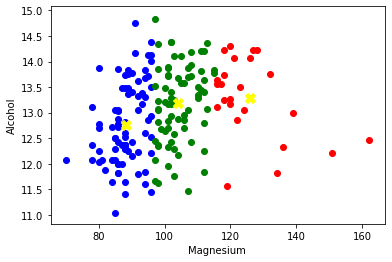

In [25]:
color=['blue','green','red']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Magnesium"],data["Alcohol"],c=color[k])
plt.scatter(centroids["Magnesium"],centroids["Alcohol"],c='yellow', marker = 'X',s = 100) #Centroids
plt.xlabel('Magnesium ')
plt.ylabel('Alcohol')
plt.show()

### Let's try to take a look at the clusters using Sklearn K-Means++

In [75]:
from sklearn.cluster import KMeans

In [76]:
#Selecting the Alcohol and Magnesium values from the dataset
X = dataset.iloc[:,[6,1]].values

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. 


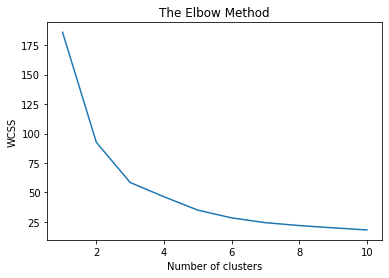

In [77]:
#Using the Elbow Method to determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [50]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) 


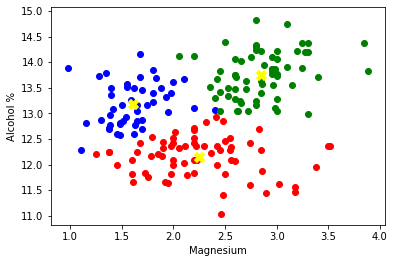

In [56]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red',)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker = 'X',s = 100)
plt.xlabel("Magnesium")
plt.ylabel("Alcohol %")
plt.show()

References:
+ Machine Learning A-Z Course on Udemy.com
+ Python Data Science Handbook Essential Tools for Working with Data, Jake VanderPlas

# 4. K-Means can go wrong!

You might know that k-means performances are significantly conditioned by its initialization. Provide an example that shows that with wrong initialization, the cost of the solution produced by the k-means algorithm can be arbitrarily larger from the cost of the optimal solution. 

One of the most common difficulties data scientists/machine learning engineers face in k-means clustering is the positioning of the initial centroids, as close to the optimal as possible, and doing this thing in the shortest amount of time possible. KMeans uses a randomized algorithm for initializing the centroids, but with the wrong initialization can lead to increased numbers of required clustering iterations to reach convergence, a greater overall runtime, and a less-efficient algorithm overall.
The actual clustering method of the k-means algorithm, which follows centroid initialization, and which is iterated upon until the “best” centroid location is found, is highly sensitive to the initial placement of the centroids. The better the initial centroid placement, generally the fewer iterations are required, and the faster and more efficient the algorithm is. We can say that KMeans can give us really good and clever results, but the algorithm that it uses is usually resource intensive and time-consuming.


#### First we are going to check how much time does it take for the KMeans++ algorithm to execute and give us the result. Then we will do a comparision with the simple KMeans algorithm

In [71]:
#Importing the Time module in order to calculate the time needed for the algorithms to execute
import time

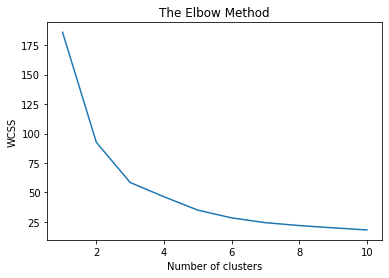

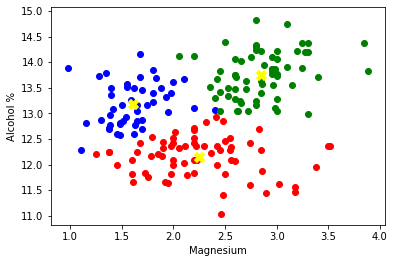

K-means++ time:  1.0794072151184082


In [72]:

from sklearn.cluster import KMeans
start = time.time()

#Selecting the Alcohol and Magnesium values from the dataset
X = dataset.iloc[:,[6,1]].values

#Using the Elbow Method to determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) 


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red',)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker = 'X',s = 100)
plt.xlabel("Magnesium")
plt.ylabel("Alcohol %")
plt.show()

kmeansplus = time.time() - start
print('K-means++ time: ', kmeansplus)


#### Now let's see our KMeans randomized algorithm how much time will it take.

In [73]:
X = dataset[["Magnesium","Alcohol"]]


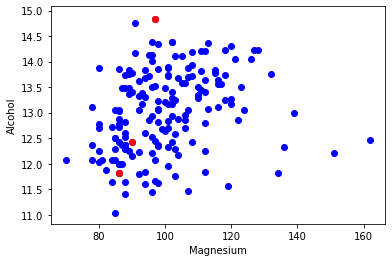

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


6.1631411157874645
6.130459648048523
6.2299855613229
4.775037596754958
2.6142222323048756
1.6494435879199152
0.0


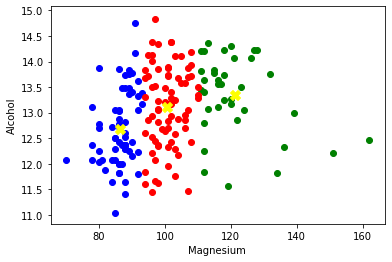

K-means time:  1.728872537612915


In [74]:
start = time.time()


centroids = (X.sample(n=K))
plt.scatter(X["Magnesium"],X["Alcohol"],c='blue')
plt.scatter(centroids["Magnesium"],centroids["Alcohol"],c='red')
plt.xlabel('Magnesium')
plt.ylabel('Alcohol')
plt.show()

calculation = 1
j=0

while(calculation!=0):

    x_distance=X
    i=1
    for index1,row_c in centroids.iterrows():
        euclidean=[]
        for index2,row_d in x_distance.iterrows():
            d1=(row_c["Magnesium"]-row_d["Magnesium"])**2
            d2=(row_c["Alcohol"]-row_d["Alcohol"])**2
            d=np.sqrt(d1+d2)
            euclidean.append(d)
        X[i]=euclidean
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    centroids_new = X.groupby(["Cluster"]).mean()[["Magnesium","Alcohol"]]
    if j == 0:
        calculation=1
        j=j+1
    else:
        calculation = (centroids_new['Magnesium'] - centroids['Magnesium']).sum() + (centroids_new['Alcohol'] - centroids['Alcohol']).sum()
        print(calculation.sum())
    centroids = X.groupby(["Cluster"]).mean()[["Magnesium","Alcohol"]]

color=['blue','green','red']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Magnesium"],data["Alcohol"],c=color[k])
plt.scatter(centroids["Magnesium"],centroids["Alcohol"],c='yellow', marker = 'X',s = 100) #Centroids
plt.xlabel('Magnesium ')
plt.ylabel('Alcohol')
plt.show()

kmeans_time = time.time() - start
print('K-means time: ', kmeans_time)


Even though it is not such a big difference between the times of execution of the both algorithms (KMeans: 1.72, Kmeans++: 1.07), using the Wine dataset, but imagine if we would have a dataset with more than 100'000 (or even a lot more), than the difference would be huge compared to the one we have now.